In this project we will be creating a book recommendation system and testing several approaches to this challenge.
We will be using a Kaggle dataset (https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

The goal of the project is to feed the system a title of the book, and the system will provide a couple of reading options that the user may enjoy.

First of all, Let's start with some EDA.

The data for this challenge consists of 3 files

The book catalogue -

First of all, here is a description from the kaggle page - "Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site."

The users list (Id, location and age)

And of course, the ratings (The ISBN, the UserId and how they rated the book)


Lets write some code to visualize this.

Book data shape
(271360, 8)


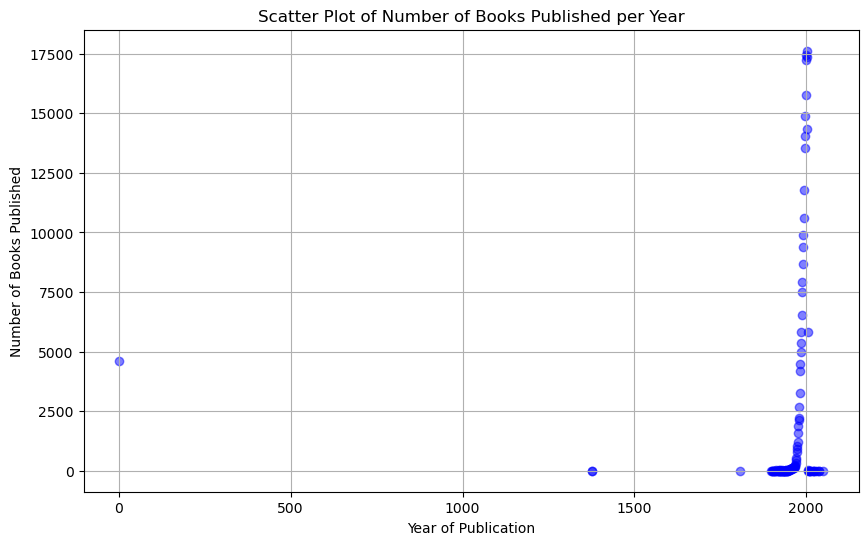

Oldest Book:
Title: Kabale Und Liebe
Author: Schiller
Year of Publication: 0.0
Publisher: Philipp Reclam, Jun Verlag GmbH

Newest Book:
Title: Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)
Author: Lewis Carroll
Year of Publication: 2050.0
Publisher: Puffin Books
Number of books published earlier than 1900: 4622
Number of books published after 2010: 20
Number of books published between 1990 and 2010: 198483


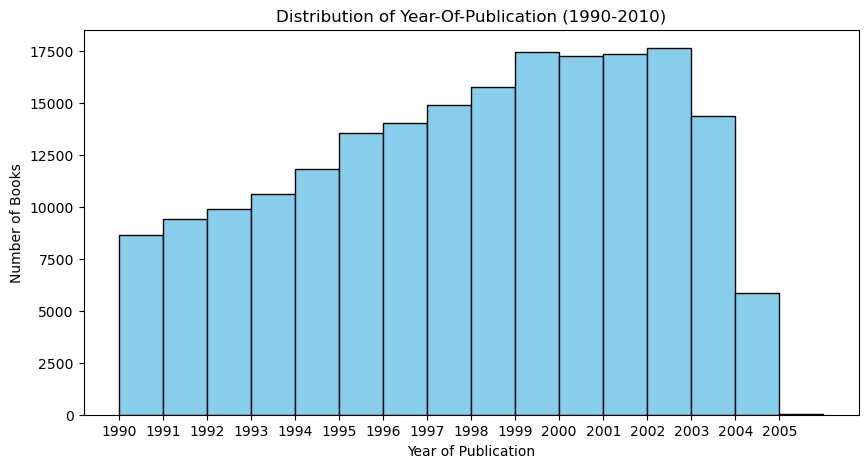

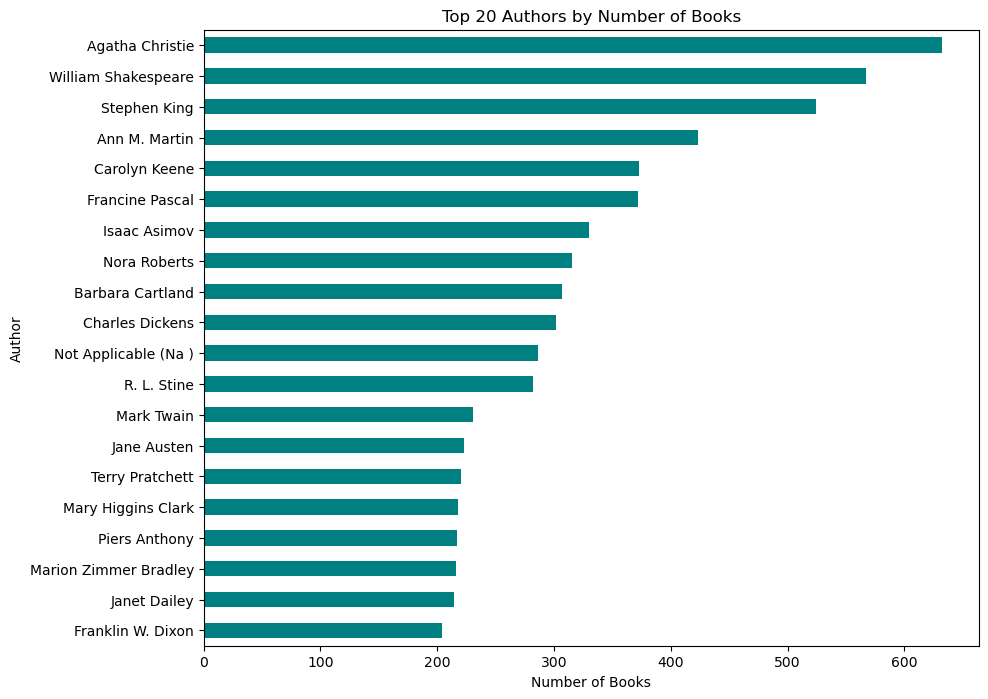


Correlation matrix:
                      Book-Title  Book-Author  Year-Of-Publication  Publisher
Book-Title             1.000000     0.015157             0.022023   0.010368
Book-Author            0.015157     1.000000             0.004502   0.020270
Year-Of-Publication    0.022023     0.004502             1.000000   0.006290
Publisher              0.010368     0.020270             0.006290   1.000000


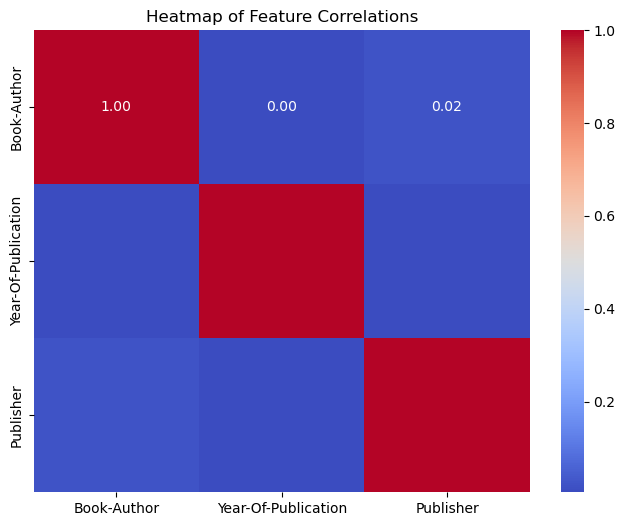

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset with dtype specification
dtype_spec = {
    'ISBN': 'str',  # Example: Force ISBN to be a string
    'Year-Of-Publication': 'str',  # Read Year-Of-Publication as string initially
    'Book-Title': 'str',
    'Book-Author': 'str',
    'Publisher': 'str'
}

books_df = pd.read_csv('Books.csv', dtype=dtype_spec, low_memory=False)
print("Book data shape")
print(books_df.shape)

# Convert Year-Of-Publication to numeric, coercing errors
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Group by Year-Of-Publication and count the number of books published each year
yearly_counts = books_df['Year-Of-Publication'].value_counts().sort_index()

# Scatter plot of Year-Of-Publication counts
plt.figure(figsize=(10, 6))
plt.scatter(yearly_counts.index, yearly_counts.values, alpha=0.5, color='blue')
plt.title('Scatter Plot of Number of Books Published per Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.show()

# Filter for years between 1990 and 2010
filtered_years = books_df[(books_df['Year-Of-Publication'] >= 1990) & (books_df['Year-Of-Publication'] <= 2006)]['Year-Of-Publication'].dropna()

# Find the oldest and newest book
oldest_book = books_df.loc[books_df['Year-Of-Publication'].idxmin()]
newest_book = books_df.loc[books_df['Year-Of-Publication'].idxmax()]


# Print the details of the oldest and newest book
print("Oldest Book:")
print(f"Title: {oldest_book['Book-Title']}")
print(f"Author: {oldest_book['Book-Author']}")
print(f"Year of Publication: {oldest_book['Year-Of-Publication']}")
print(f"Publisher: {oldest_book['Publisher']}")

print("\nNewest Book:")
print(f"Title: {newest_book['Book-Title']}")
print(f"Author: {newest_book['Book-Author']}")
print(f"Year of Publication: {newest_book['Year-Of-Publication']}")
print(f"Publisher: {newest_book['Publisher']}")

# Convert Year-Of-Publication to numeric, coercing errors to NaN
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Filter books published earlier than 1900
books_before_1900 = books_df[books_df['Year-Of-Publication'] < 1900]

# Filter books published after 2010
books_after_2010 = books_df[books_df['Year-Of-Publication'] > 2010]
# Filter books published between 1990 and 2010
books_between_1990_and_2010 = books_df[(books_df['Year-Of-Publication'] >= 1990) & (books_df['Year-Of-Publication'] <= 2010)]


# Print the results
print(f"Number of books published earlier than 1900: {len(books_before_1900)}")
print(f"Number of books published after 2010: {len(books_after_2010)}")
print(f"Number of books published between 1990 and 2010: {len(books_between_1990_and_2010)}")

# Distribution of Year-Of-Publication from 1990 to 2010
plt.figure(figsize=(10, 5))
plt.hist(filtered_years, bins=16, color='skyblue', edgecolor='black')
plt.title('Distribution of Year-Of-Publication (1990-2010)')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xticks(np.arange(1990, 2006, 1))  # Set x-axis ticks from 1990 to 2010
plt.show()



# Top 20 authors
top_authors = books_df['Book-Author'].value_counts().head(20)
plt.figure(figsize=(10, 8))
top_authors.plot(kind='barh', color='teal')
plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.gca().invert_yaxis()
plt.show()


# Encode categorical variables for analysis
label_encoder = LabelEncoder()
books_df['Book-Author'] = label_encoder.fit_transform(books_df['Book-Author'].astype(str))
books_df['Publisher'] = label_encoder.fit_transform(books_df['Publisher'].astype(str))
books_df['Book-Title'] = label_encoder.fit_transform(books_df['Book-Title'].astype(str))

# Select only numeric columns for correlation matrix
numeric_cols = books_df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_cols.corr()
print("\nCorrelation matrix:\n", correlation_matrix)

# PCA for dimensionality reduction
features = ['Book-Author', 'Year-Of-Publication', 'Publisher']
x = books_df.loc[:, features].values
x = np.nan_to_num(x)  # Handle NaNs by converting them to 0

# Standardize the data
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# Perform PCA
pca = PCA()
pca.fit(x_standardized)

# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = pd.DataFrame(x_standardized, columns=features).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

Lets take a look at the users and their reviews.

Users data shape
(278858, 3)
Ratings data shape
(1149780, 3)
Users Dataset - Descriptive Statistics:
            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000


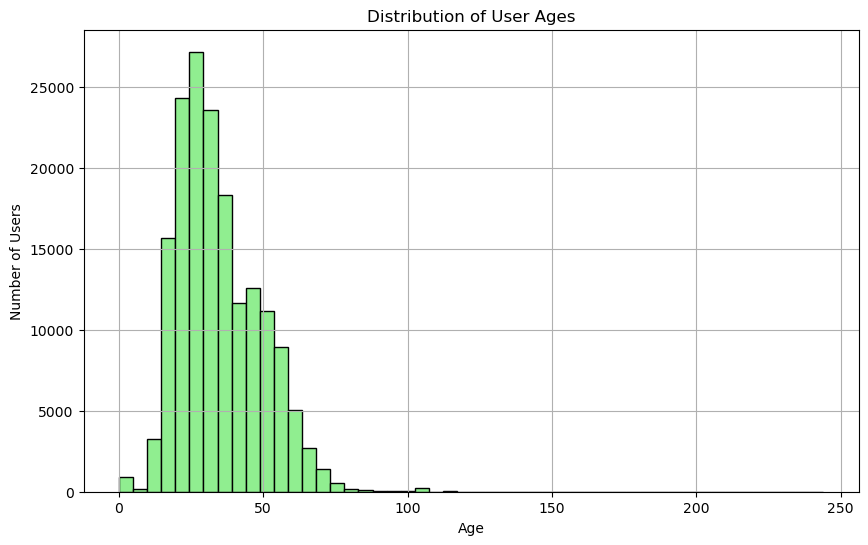

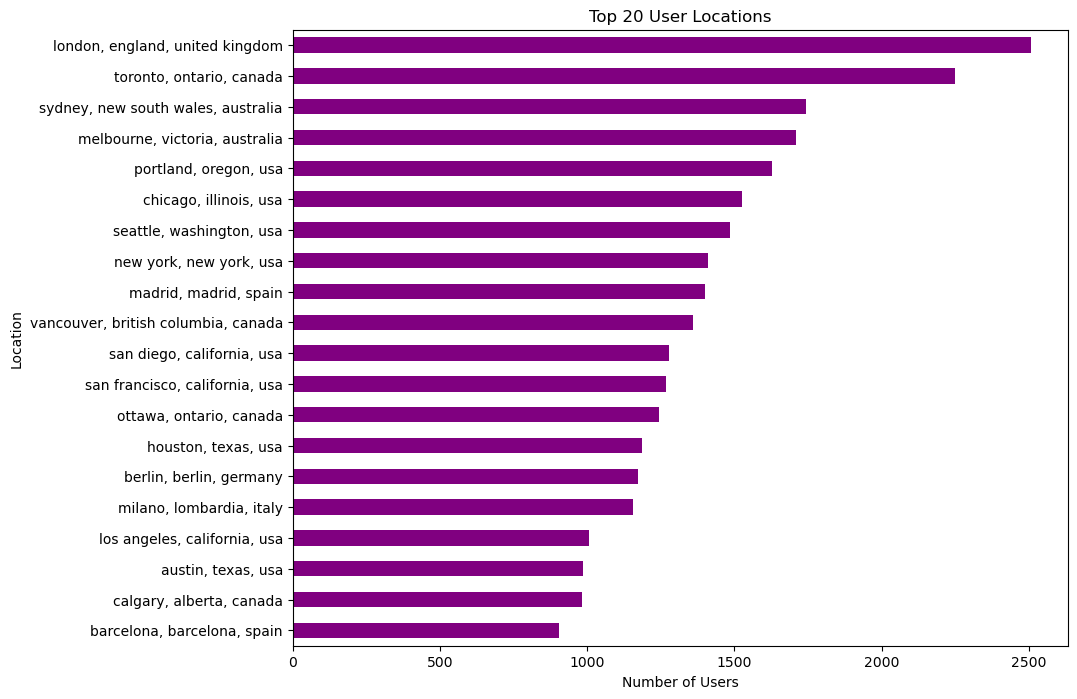

Ratings Dataset - Descriptive Statistics:
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


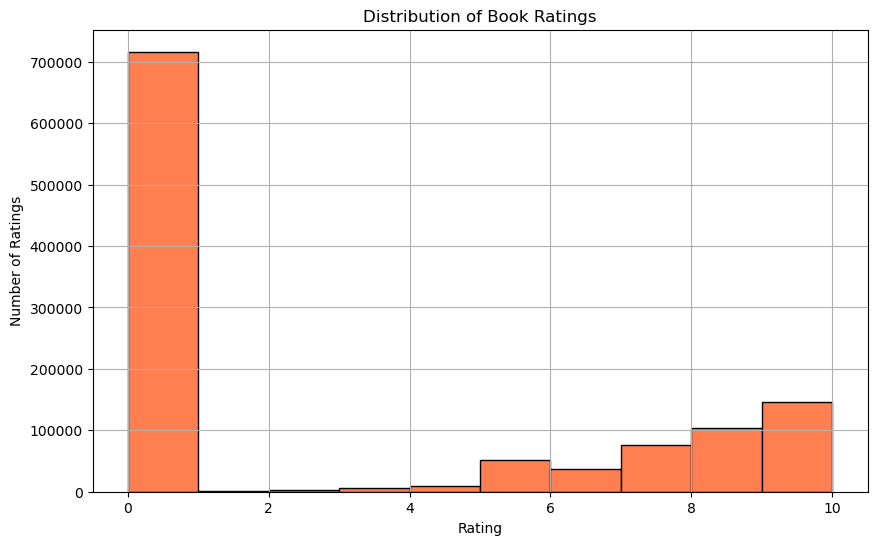

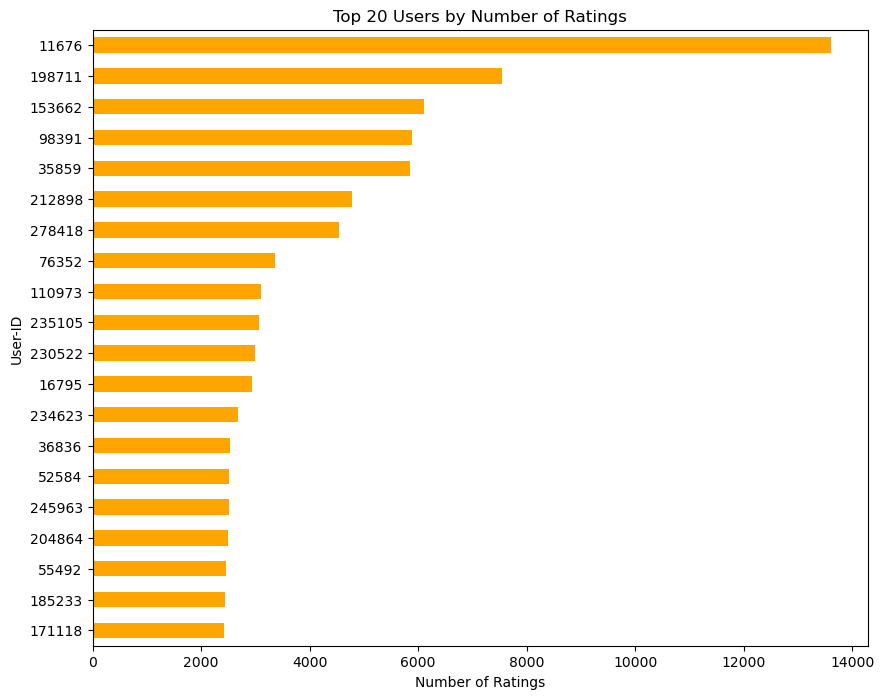

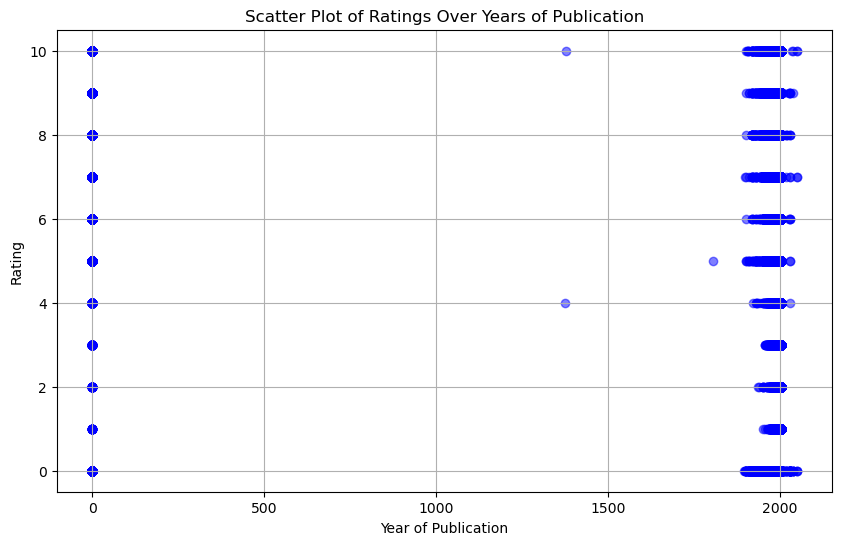

C:\Users\gofma\AppData\Local\Temp\ipykernel_33856\3729901666.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_age = merged_df.groupby(age_groups)['Book-Rating'].mean()


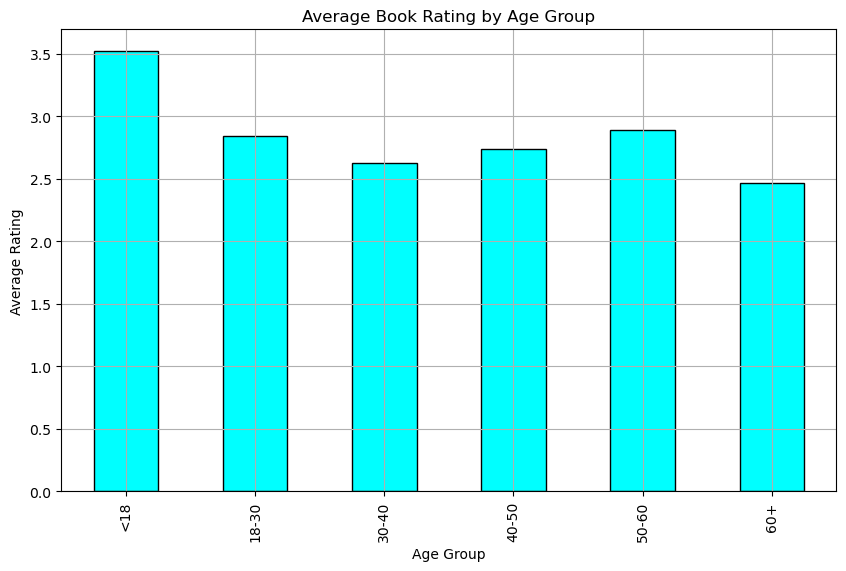

In [2]:
### Users Dataset EDA ###
# Descriptive statistics of users
users_df = pd.read_csv('Users.csv', dtype={'User-ID': 'int', 'Location': 'str', 'Age': 'float'}, low_memory=False)
ratings_df = pd.read_csv('Ratings.csv', dtype={'User-ID': 'int', 'ISBN': 'str', 'Book-Rating': 'int'}, low_memory=False)

print("Users data shape")
print(users_df.shape)


print("Ratings data shape")
print(ratings_df.shape)


print("Users Dataset - Descriptive Statistics:")
print(users_df.describe())

# Age distribution
plt.figure(figsize=(10, 6))
plt.hist(users_df['Age'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Top 20 locations
top_locations = users_df['Location'].value_counts().head(20)
plt.figure(figsize=(10, 8))
top_locations.plot(kind='barh', color='purple')
plt.title('Top 20 User Locations')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.gca().invert_yaxis()
plt.show()

### Ratings Dataset EDA ###
# Descriptive statistics of ratings
print("Ratings Dataset - Descriptive Statistics:")
print(ratings_df.describe())

# Rating distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings_df['Book-Rating'], bins=10, color='coral', edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

# Ratings by top 20 users
top_users = ratings_df['User-ID'].value_counts().head(20)
plt.figure(figsize=(10, 8))
top_users.plot(kind='barh', color='orange')
plt.title('Top 20 Users by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('User-ID')
plt.gca().invert_yaxis()
plt.show()

### Combined Analysis ###
# Merge ratings with books and users
merged_df = pd.merge(ratings_df, books_df, on='ISBN')
merged_df = pd.merge(merged_df, users_df, on='User-ID')

# Distribution of ratings over time
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Year-Of-Publication'], merged_df['Book-Rating'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Ratings Over Years of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Average rating per age group
age_groups = pd.cut(merged_df['Age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'])
average_rating_by_age = merged_df.groupby(age_groups)['Book-Rating'].mean()

plt.figure(figsize=(10, 6))
average_rating_by_age.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Average Book Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Choosing an approach to building a recommender system.

There are several approaches to building a recommender system.
Let's discuss them 
One of the main approaches is collaborative filtering. The idea of collaborative filtering is that recommendations are provided based on interactions with the data.
In general, collaborative filtering has 2 main sub-approaches.

User-Based Collaborative Filtering: This approach identifies users who are similar to the target user based on their past interactions (e.g., ratings, clicks) and recommends items that those similar users have liked or interacted with.
Item-Based Collaborative Filtering: This method identifies items that are similar to the ones the target user has interacted with and recommends these similar items to the user.

The other is based of the a different idea - With Content based filtering, recommendations are made by analyzing the features of items and suggesting items similar to those the user has interacted with. For example, if a user likes a certain type of movie, the system will recommend other movies with similar characteristics (e.g., genre, director, cast).


Looking over our EDA, we can clearly see that the only data we can really work with the users and their ratings.
We don't have much data about the users, so we can't really take the approach of looking for a similar user and using their preferences to generate recommendations. 
We will however try to utilize the information about the users as much as we can, building a system that uses the age and location of the users as well.
We also do not know much about the books we are recommending, we have no descriptions in the dataset. 

This leaves us only one viable option - build a system that uses the Item Based approach. The idea is to recommend items that are similar to items a user has already rated highly.

Before we get to building a recommender system, we should prepare the data and normalize it.
Though data preparation may vary between the types of systems we use. 


For us, the data cleaning aspect will be fairly simple, as ratings and books ISBN's don't require much cleaning or normalization.
However, prior to running our recommender formatting the data is a more challenging task than altering and cleaning it. 

In the following steps we will create an item-based collaborative filtering system for recommending books. It starts by merging book ratings, titles, and user data, then cleans up the user location info. It filters out users who haven’t rated at least 200 books and focuses on books that have been rated by at least 50 users. The core of the system is a pivot table where each row represents a book and each column represents a user, with the cells filled in by the user's rating of the book. Missing ratings are filled with zeros, making the table ready for calculating similarities between books to suggest similar ones to users.

In [3]:
from sklearn.model_selection import train_test_split
# Data Cleaning
# Fill missing age with median age
# Remove unnecessary columns from Books dataset

books_df = pd.read_csv('Books.csv', dtype=dtype_spec, low_memory=False)
users_df = pd.read_csv('Users.csv', dtype={'User-ID': 'int', 'Location': 'str', 'Age': 'float'}, low_memory=False)
ratings_df = pd.read_csv('Ratings.csv', dtype={'User-ID': 'int', 'ISBN': 'str', 'Book-Rating': 'int'}, low_memory=False)
books_df.drop(columns=['Image-URL-S', 'Image-URL-M'], inplace=True)

users_df.loc[:, 'Age'] = users_df['Age'].fillna(users_df['Age'].median())



In [4]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

ratings_with_book_titles = ratings_df.merge(books_df,on='ISBN')


complete_df = ratings_with_book_titles.merge(users_df.drop("Age", axis=1), on="User-ID")
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip()

# Select user IDs with more than 200 book ratings
min_ratings_threshold = 200

# Count book ratings per user
num_ratings_per_user = complete_df.groupby('User-ID')['Book-Rating'].count()
# Filter users with more than the minimum threshold
knowledgeable_user_ids = num_ratings_per_user[num_ratings_per_user > min_ratings_threshold].index
knowledgeable_user_ratings = complete_df[complete_df['User-ID'].isin(knowledgeable_user_ids)]


min_ratings_count_threshold=50
rating_counts= knowledgeable_user_ratings.groupby('Book-Title').count()['Book-Rating']


popular_books = rating_counts[rating_counts >= min_ratings_count_threshold].index


final_ratings =  knowledgeable_user_ratings[knowledgeable_user_ratings['Book-Title'].isin(popular_books)]

pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID'
                          ,values='Book-Rating')
pt.fillna(0,inplace=True)


final_ratings =  knowledgeable_user_ratings[knowledgeable_user_ratings['Book-Title'].isin(popular_books)]
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID'
                          ,values='Book-Rating')
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's start with a basic implementation - we will use cosine similarity to recommend books similar to a given title. The code calculates how similar books are based on user ratings, then finds and returns the top 5 books most like the specified one. Cosine similarity measures how closely the ratings of two books match, with higher values indicating more similar books

In [5]:
similarity_score = cosine_similarity(pt)

def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books_df[books_df['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))

        
        data.append(item)
    return data

In [6]:
r1 = recommend("A Walk to Remember")
print(r1)
print("Recommendation N2")
r2 = recommend("Zoya")
print(r2)
print("Recommendation N3")
r3 = recommend("You Belong To Me")
print(r3)


[['The Rescue', 'Nicholas Sparks'], ['Nights in Rodanthe', 'Nicholas Sparks'], ['The Notebook', 'Nicholas Sparks'], ['Granny Dan', 'DANIELLE STEEL'], ['A Bend in the Road', 'Nicholas Sparks']]
Recommendation N2
[['Fine Things', 'Danielle Steel'], ['Secrets', 'DANIELLE STEEL'], ['Kaleidoscope', 'June Stepansky'], ['Exclusive', 'Sandra Brown'], ['Five Days in Paris', 'DANIELLE STEEL']]
Recommendation N3
[['Loves Music, Loves to Dance', 'Mary Higgins Clark'], ["I'll Be Seeing You", 'Mary Higgins Clark'], ['Before I Say Good-Bye', 'Mary Higgins Clark'], ["Daddy's Little Girl", 'Mary Higgins Clark'], ['All Around the Town', 'Mary Higgins Clark']]


Let's make things a bit more nuanced and try a hybrid system. We will try to utilize the little information we have about the users (their age) in a approach that accounts for the users age when recommending.

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the age data
scaler = MinMaxScaler()
users_df['Age'] = scaler.fit_transform(users_df[['Age']].fillna(users_df['Age'].mean()))

# Add age to the pivot table for similarity adjustment
def age_adjusted_similarity(user_id1, user_id2, original_similarity):
    age_diff = abs(users_df.loc[user_id1, 'Age'] - users_df.loc[user_id2, 'Age'])
    age_penalty = 1 - age_diff  # Subtract the difference from 1 to decrease similarity with age difference
    return original_similarity * age_penalty

# Incorporate age into the similarity matrix
def calculate_age_adjusted_similarity(pt, original_similarity):
    adjusted_similarity = original_similarity.copy()
    
    for i in range(len(pt.index)):
        for j in range(len(pt.index)):
            user_id1 = pt.columns[i]
            user_id2 = pt.columns[j]
            adjusted_similarity[i, j] = age_adjusted_similarity(user_id1, user_id2, original_similarity[i, j])
    
    return adjusted_similarity

# Adjust the similarity scores with age
similarity_score_with_age = calculate_age_adjusted_similarity(pt, similarity_score)

# Update the recommendation function to use the age-adjusted similarity score
def recommend_with_age(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score_with_age[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books_df[books_df['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
    return data

# Example usage:
recommendations_with_age = recommend_with_age("A Walk to Remember")
print(recommendations_with_age)

[['The Rescue', 'Nicholas Sparks'], ['Nights in Rodanthe', 'Nicholas Sparks'], ['Granny Dan', 'DANIELLE STEEL'], ['The Notebook', 'Nicholas Sparks'], ['A Bend in the Road', 'Nicholas Sparks']]


In [8]:
r1 = recommend("A Walk to Remember")
print(r1)
print("Recommendation N2")
r2 = recommend("Zoya")
print(r2)
print("Recommendation N3")
r3 = recommend("You Belong To Me")
print(r3)


[['The Rescue', 'Nicholas Sparks'], ['Nights in Rodanthe', 'Nicholas Sparks'], ['The Notebook', 'Nicholas Sparks'], ['Granny Dan', 'DANIELLE STEEL'], ['A Bend in the Road', 'Nicholas Sparks']]
Recommendation N2
[['Fine Things', 'Danielle Steel'], ['Secrets', 'DANIELLE STEEL'], ['Kaleidoscope', 'June Stepansky'], ['Exclusive', 'Sandra Brown'], ['Five Days in Paris', 'DANIELLE STEEL']]
Recommendation N3
[['Loves Music, Loves to Dance', 'Mary Higgins Clark'], ["I'll Be Seeing You", 'Mary Higgins Clark'], ['Before I Say Good-Bye', 'Mary Higgins Clark'], ["Daddy's Little Girl", 'Mary Higgins Clark'], ['All Around the Town', 'Mary Higgins Clark']]


And as an experiment let's extend this just a little bit more taking the location of the user into consideration.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the age data
scaler = MinMaxScaler()
users_df['Age'] = scaler.fit_transform(users_df[['Age']].fillna(users_df['Age'].mean()))

# Define the location penalty function
def location_adjusted_similarity(user_id1, user_id2):
    # Assuming 'Location' is a string feature and exact match is needed
    if users_df.loc[user_id1, 'Location'] == users_df.loc[user_id2, 'Location']:
        return 1  # No penalty
    else:
        return 0.5  # Apply a penalty if locations are different

# Adjusted similarity function for both age and location
def combined_similarity(user_id1, user_id2, original_similarity):
    age_diff = abs(users_df.loc[user_id1, 'Age'] - users_df.loc[user_id2, 'Age'])
    age_penalty = 1 - age_diff  # Decrease similarity with age difference
    
    location_penalty = location_adjusted_similarity(user_id1, user_id2)
    
    return original_similarity * age_penalty * location_penalty

# Incorporate age and location into the similarity matrix
def calculate_combined_similarity(pt, original_similarity):
    adjusted_similarity = original_similarity.copy()
    
    for i in range(len(pt.index)):
        for j in range(len(pt.index)):
            user_id1 = pt.columns[i]
            user_id2 = pt.columns[j]
            adjusted_similarity[i, j] = combined_similarity(user_id1, user_id2, original_similarity[i, j])
    
    return adjusted_similarity

# Adjust the similarity scores with age and location
similarity_score_with_age_and_location = calculate_combined_similarity(pt, similarity_score)

# Update the recommendation function to use the combined similarity score
def recommend_with_age_and_location(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score_with_age_and_location[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books_df[books_df['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
    return data

# Example usage:
r1 = recommend("A Walk to Remember")
print(r1)
print("Recommendation N2")
r2 = recommend("Zoya")
print(r2)
print("Recommendation N3")
r3 = recommend("You Belong To Me")
print(r3)

[['The Rescue', 'Nicholas Sparks'], ['Nights in Rodanthe', 'Nicholas Sparks'], ['The Notebook', 'Nicholas Sparks'], ['Granny Dan', 'DANIELLE STEEL'], ['A Bend in the Road', 'Nicholas Sparks']]
Recommendation N2
[['Fine Things', 'Danielle Steel'], ['Secrets', 'DANIELLE STEEL'], ['Kaleidoscope', 'June Stepansky'], ['Exclusive', 'Sandra Brown'], ['Five Days in Paris', 'DANIELLE STEEL']]
Recommendation N3
[['Loves Music, Loves to Dance', 'Mary Higgins Clark'], ["I'll Be Seeing You", 'Mary Higgins Clark'], ['Before I Say Good-Bye', 'Mary Higgins Clark'], ["Daddy's Little Girl", 'Mary Higgins Clark'], ['All Around the Town', 'Mary Higgins Clark']]


Results overview and model comparison.

If we check recommendations provided for our dataset, they seem very reasonable and useful. 
All three of the approaches / models we created provide identical results for the examples we looked at here.

For example, "You belong to me"  is written by Mary Higgens clark, all of the recommended books belong to the same author, which is a reasonable suggestion.

Let's also look at "Zoya" written by Danielle Steel. Besides Exclusive by Sandra Brown, all recommended  books are written by the same author.
The book by Sandra Brown is also highly rated (4.5 on Amazon) and much like Zoya is set in a tumultuous political environment. And though not backed up by data - it seems like a very good suggestion. 

As for the model comparison - The hybrid models perform nearly identical on the dataset we have.

However, unfortunately, the data set we are dealing with is a bit limited. There isn't any specific test data, that would provide us with information on how similiar one book is to another.
This prevents us from using more formal effectivness metrics like RMSE, which would be very nice.


Conclusion. 

Overall, I am satisfied with the project we created. The system works and is fully functional and can actually be utilized in a real environment.
I am also fond that i managed to created a hybrid working system that accounts for age and location.

Nonetheless, there are many things I would like to enhance in this project.
The improvements i have in mind are based around extending the dataset.

Mostly, the data set we are given was a bit scarce, it lacked any real data about the books (description, plot summary, genre). 
This would allow us to further enhance our hybrid approach, adding in content based techniques. 

I am also slightly dissatisfied that the Hybrid models didn't really add much to the results.

And lastly, as previously mentioned, some dedicated test data would be nice